# Project 2 - Advanced Methods in Applied Statistics 2024 - Emilie Jessen

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from iminuit import Minuit

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Add grid
mpl.rc('axes', grid=True)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid', 'black', 'slategrey', 
                'navy', 'magenta', 'forestgreen', 'lightblue', 'maroon', 'gold', 'lightcoral', 
                'mediumseagreen', 'darkorange', 'darkviolet', 'dimgray', 'darkblue', 'darkred',]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

In [3]:
save_plots = True
np.random.seed(42)

# Exercise 1

In [4]:
data = np.loadtxt('Exam_2023_Prob1.txt')

x1 = data[:,0]
x2 = data[:,1]
x3 = data[:,2]

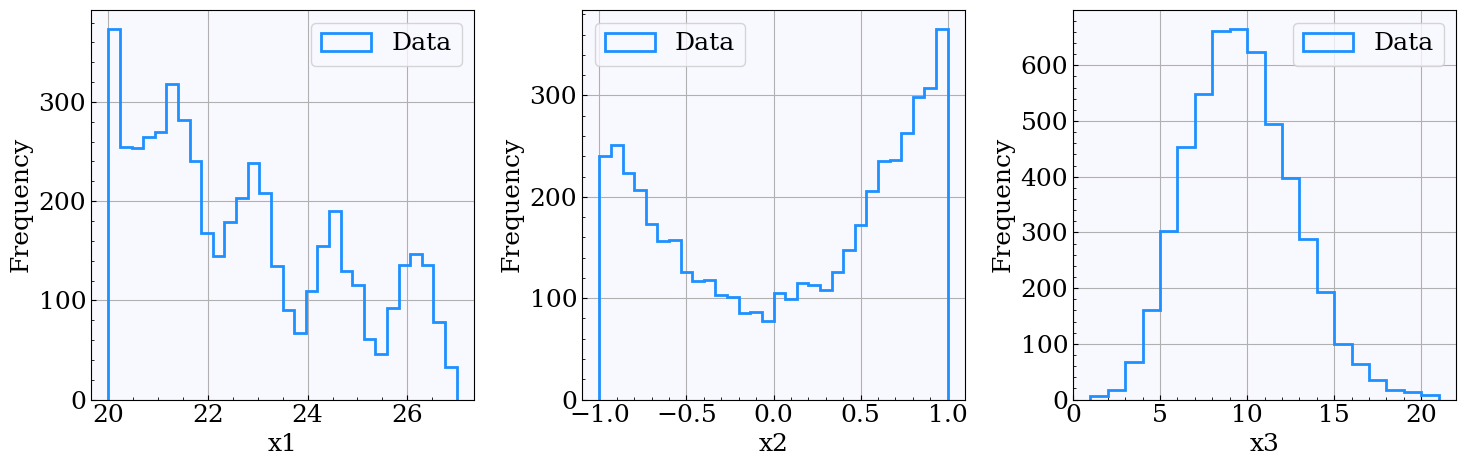

In [31]:
# Plot distributions of the data

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(x1, bins=30, histtype='step', lw=2, label='Data')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(x2, bins=30, histtype='step', lw=2, label='Data')
ax[1].set_xlabel('x2')
ax[1].set_ylabel('Frequency')
ax[1].legend()

ax[2].hist(x3, bins=20, histtype='step', lw=2, label='Data')
ax[2].set_xlabel('x3')
ax[2].set_ylabel('Frequency')
ax[2].legend()

fig.tight_layout()

In [40]:
x1_arr = np.linspace(20, 27, 1000)
x2_arr = np.linspace(-1, 1, 1000)
x3_arr = np.linspace(x3.min(), x3.max(), 1000)

bounds = np.array([[-10, 10], [-10, 10], [4000, 8000]])

In [45]:
# Use nested sampling to find the best fit parameters
import nestle

def func1(x, a, b, c):
    func = np.sin(a * x) + c * np.exp(b*x) + 1
    norm = np.trapz(np.sin(a * x1_arr) + c * np.exp(b*x1_arr) + 1, x1_arr)
    return func/norm

def loglike(params):
    model = func1(x1, *params)
    llh = np.sum(np.log(model))
    return llh

def prior_transform(params):
    return bounds[:, 0] + (bounds[:, 1] - bounds[:, 0]) * params

ndim = 3
nlive = 100

result = nestle.sample(loglike, prior_transform, ndim, npoints=nlive)

In [48]:
print(result.summary())

p, cov = nestle.mean_and_cov(result.samples, result.weights)
print("a = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("b = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))
print("c = {0:5.2f} +/- {1:5.2f}".format(p[2], np.sqrt(cov[2, 2])))


niter: 1750
ncall: 194762
nsamples: 1850
logz: -9318.689 +/-  0.393
h: 15.431
a =  3.90 +/-  0.02
b = -0.36 +/-  0.01
c = 6372.83 +/- 1042.33


In [50]:
def llh1(x, a, b, c):
    return -np.sum(np.log(func1(x, a, b, c)))

def fit_obj1(a, b, c):
    return llh1(np.sort(x1), a, b, c)

m1 = Minuit(fit_obj1, a=p[0], b=p[1], c=p[2])
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9302                       │              Nfcn = 71               │
│ EDM = 5.4e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  3.8992   │  0.0027   │            │            │         │         │       │
│ 1 │ b    │  -0.365   │   0.019   │            │            │         │         │       │
│ 2 │ c    │   7.1e3   │   2.7e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 7.36e-06 2.69e-06   -0.404 │
│ b │ 2.69e-06  0.00035    -48.3 │
│ c │   -0.404    -48.3 7.03e+06 │
└───┴────────────────────────────┘

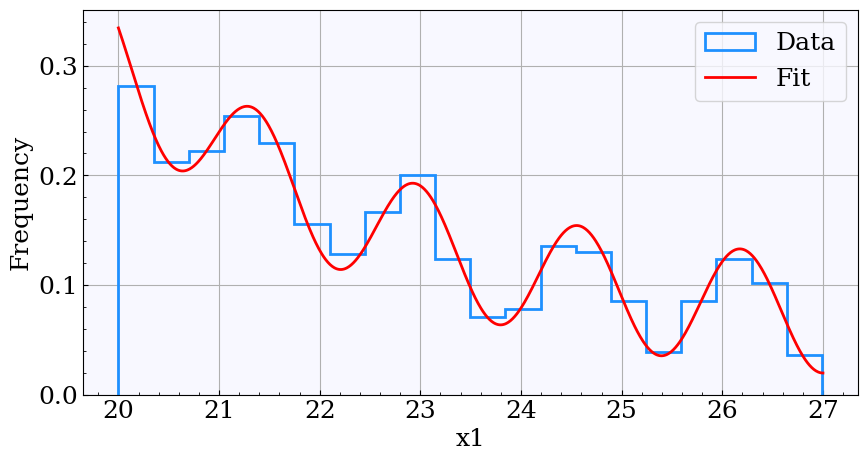

In [52]:
# Plot the fit
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(x1, bins=20, histtype='step', lw=2, density=True, label='Data')
ax.plot(x1_arr, func1(x1_arr, *m1.values[:]), lw=2, label='Fit')

ax.set_xlabel('x1')
ax.set_ylabel('Frequency')
ax.legend();

In [21]:
def func2(x, a, b): 
    f = 1 + a*x + b*x**2
    f /= np.trapz(f, x)
    return f

def llh2(x, a, b):
    return -np.sum(np.log(func2(x, a, b)))

def fit_obj2(a, b):
    return llh2(np.sort(x2), a, b)

m2 = Minuit(fit_obj2, a=0.5, b=0.5)
m2.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3084                       │              Nfcn = 57               │
│ EDM = 1.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.47    │   0.07    │            │            │         │         │       │
│ 1 │ b    │   2.58    │   0.23    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00542 0.00478 │
│ b │ 0.00478  0.0518 │
└───┴─────────────────┘

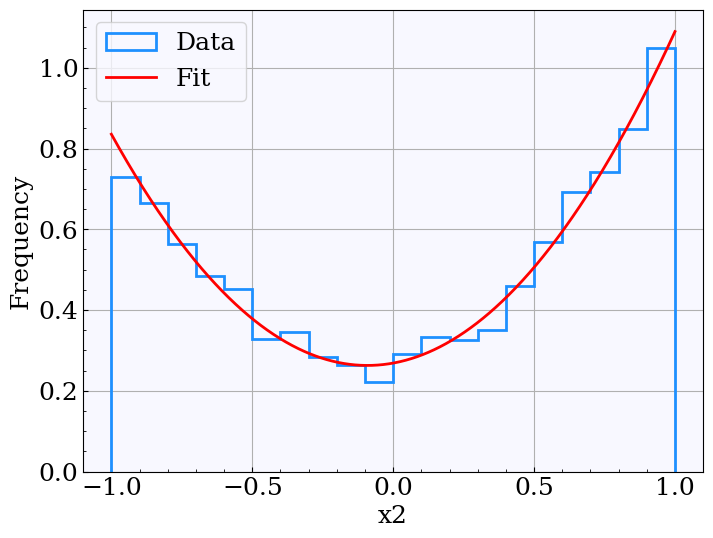

In [23]:
# Plot the data and the fit
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(x2, bins=20, histtype='step', lw=2, density=True, label='Data')
ax.plot(x2_arr, func2(x2_arr, *m2.values[:]), lw=2, label='Fit')
ax.set_xlabel('x2')
ax.set_ylabel('Frequency')
ax.legend()

# Exercise 2

In [53]:
data = np.loadtxt('Exam_2023_Problem2.txt')

In [56]:
def mollweide_projection(azi, zen, ax, title='Visualization of Data on Mollweide Projection'):
    # Background settings
    ax.set_facecolor('gainsboro')
    ax.grid(color='white')
    
    # Meridian - zenith angle from 0rad to pi (0deg to 180 deg) -pi/2 so instead goes from -pi to pi
    meridian = np.stack([np.zeros(100), np.linspace(0,np.pi,100) - np.pi/2], axis=1)
    
    # Equator from 0 rad to 2pi - pi
    equator = np.stack([np.linspace(0,2*np.pi,100) - np.pi, np.zeros(100)], axis=1)
    
    # Display it
    ax.plot(equator[:,0], equator[:,1], lw=1, color='w')
    ax.plot(meridian[:,0], meridian[:,1], lw=1, color='w')

    # Plot the data
    ax.scatter(azi-np.pi, -zen+np.pi/2, marker='*', color='k', s=50, zorder=2, label='Data')

    # Title
    ax.set_title(title)

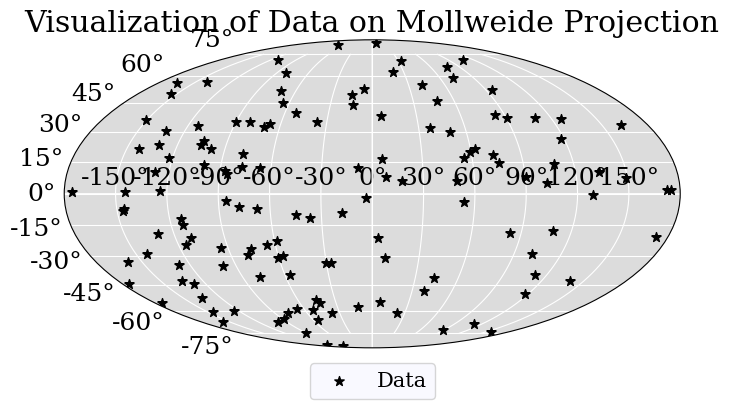

In [58]:
# Plot the data
import healpy as hp

fig, ax = plt.subplots(1, 1, figsize=(8, 4), subplot_kw={'projection': 'mollweide'})

azi = data[:,0]
zen = data[:,1]

mollweide_projection(azi, zen, ax)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), prop={'size':15})

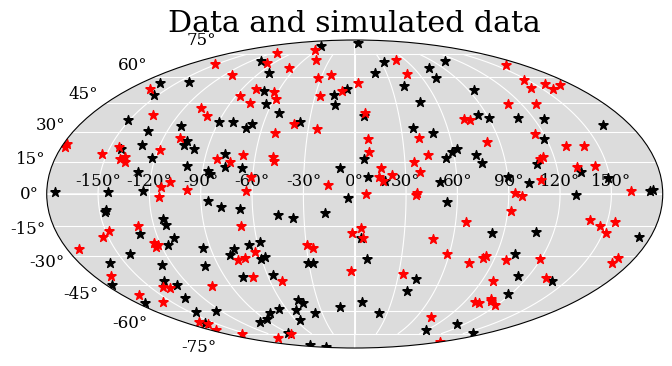

In [65]:
# Generate pseudo-experiments to produce a test-statistic distribution of a spherically isotropic distribution

def sample_isotropic_data(seed, N_points):
    np.random.seed(seed)
    MC_azi = np.random.uniform(low=0, high=2*np.pi, size=N_points)
    MC_cos_zen = np.random.uniform(low=-1, high=1, size=N_points)
    MC_zen = np.arccos(MC_cos_zen)
    return MC_azi, MC_zen   

MC_azi, MC_zen = sample_isotropic_data(42, len(azi))

fig, ax = plt.subplots(1, 1, figsize=(8, 4), subplot_kw={'projection': 'mollweide'})

mollweide_projection(azi, zen, ax, title='Data and simulated data')
ax.scatter(MC_azi-np.pi, -MC_zen+np.pi/2, marker='*', color='r', s=50, zorder=2, label='Isotropic Data')
# Change axis labels size 
ax.tick_params(axis='both', which='major', labelsize=12)

In [66]:
def auto_correlation(azi_arr, zen_arr): 
    'Counts the pairs of events that are within a angular distance ϕ'
    
    # Define number of points
    N_tot = len(azi_arr)
    
    # Convert each point into cartesian coordinates (get unit vectors: r=1)
    r = 1
    Nx_arr = r * np.cos(azi_arr) * np.sin(zen_arr)
    Ny_arr = r * np.sin(azi_arr) * np.sin(zen_arr)
    Nz_arr = r * np.cos(zen_arr)
    
    #Defining the range of cos phi's (x-axis)
    N_bins = 50
    cos_phi_bins = np.linspace(-1, 1, N_bins)

    # Array to store angular distance pairs, i.e. all cos_phi_ij
    cos_phi_ij_arr = []
    
    # Loop over N_tot (outer sum)
    for i in range(0,N_tot):
        # Loop over i-1 (inner sum)
        for j in range(0,i):
            
            # Compute the angular distance cos(phi_ij) as the dot product of N_i dot N_j
            cos_phi_ij = Nx_arr[i]*Nx_arr[j] + Ny_arr[i]*Ny_arr[j] + Nz_arr[i]*Nz_arr[j]
            
            # Store it
            cos_phi_ij_arr.append(cos_phi_ij)

    
    # Emmpty array to store two point auto correlation function (y-values)
    two_point_arr = []
    
    # Loop over our cos phi bins (x-values)
    for i in range(N_bins):
        
        # =1 for x>= 0, =0 for x<0
        heaviside = np.heaviside(cos_phi_ij_arr - cos_phi_bins[i], 0)
        two_point = (2/(N_tot*(N_tot-1)) ) * np.sum(heaviside)
        
        # Store it
        two_point_arr.append(two_point)
    
    # Calculate the isotropic prediction
    'This cumulative two point auto-correlation function for the data can'
    'then be compared to the predicted function for perfect isotropic data'
    iso_pred = (1/2)*(1-cos_phi_bins)
    
    return cos_phi_bins, two_point_arr, iso_pred

In [71]:
def KS_isotropic(dist1, dist2):
    return np.max(np.abs(dist1 - dist2))

In [73]:
bins, two_point, iso_pred = auto_correlation(azi, zen)
MC_bins, MC_two_point, MC_iso_pred = auto_correlation(MC_azi, MC_zen)

KS = KS_isotropic(two_point, iso_pred)
MC_KS = KS_isotropic(MC_two_point, MC_iso_pred)

print("KS for data: ", KS)
print("KS for MC: ", MC_KS)

KS for data:  0.022574309673822568
KS for MC:  0.00814964709687449


In [79]:
# Run pseudo-experiments to determine the p-value of the data

N_exp = 1000
KS_arr = np.zeros(N_exp)

for i in range(N_exp):
    MC_azi, MC_zen = sample_isotropic_data(i, len(azi))
    _, MC_two_point, MC_iso_pred = auto_correlation(MC_azi, MC_zen)
    KS_arr[i] = KS_isotropic(MC_two_point, MC_iso_pred)

In [82]:
# Calculate the p-value

p_value = np.sum(KS_arr > KS) / N_exp
print("p-value: ", p_value)

p-value:  0.004


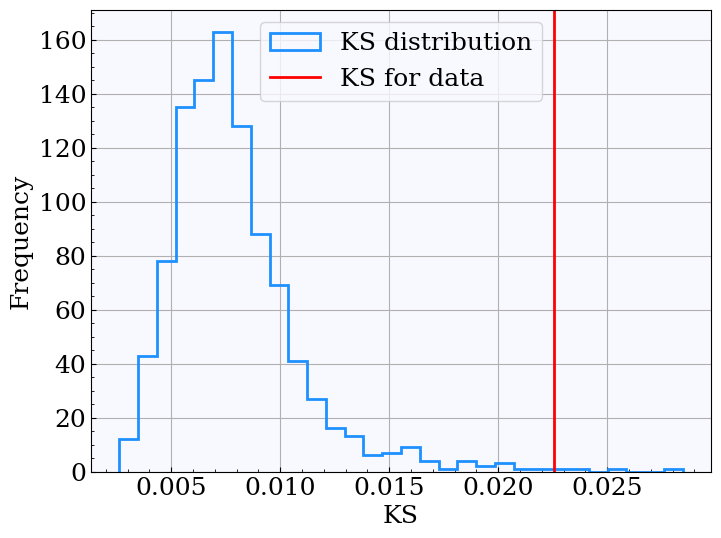

In [81]:
# Plot the distribution of the KS values and the KS value of the data

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(KS_arr, bins=30, histtype='step', lw=2, label='KS distribution')
ax.axvline(KS, color='r', lw=2, label='KS for data')
ax.set_xlabel('KS')
ax.set_ylabel('Frequency')
ax.legend();

# Exercise 3

In [85]:
data = np.loadtxt('Exam_2023_Prob3.txt')
bounds = np.array([[0, 15], [9, 27]])
x_min, x_max = 1, 3

x_arr = np.linspace(x_min, x_max, 1000)

def func(x, a, b): 
    f = np.cos(a * x) * np.cos(b * x) / x**2 + 2
    norm = np.trapz(np.cos(a * x_arr) * np.cos(b * x_arr) / x_arr**2 + 2, x_arr)
    return f/norm

# Use nested sampling to find the best fit parameters

def loglike(params):
    model = func(data, *params)
    llh = np.sum(np.log(model))
    return llh

def prior_transform(params):
    return bounds[:, 0] + (bounds[:, 1] - bounds[:, 0]) * params

ndim = 2
nlive = 100

result = nestle.sample(loglike, prior_transform, ndim, npoints=nlive)

print(result.summary())

p, cov = nestle.mean_and_cov(result.samples, result.weights)
print("a = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("b = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))

niter: 955
ncall: 23029
nsamples: 1055
logz: -5178.813 +/-  0.276
h:  7.633
a =  5.12 +/-  0.12
b = 22.45 +/-  0.11


In [86]:
def fit_obj(a, b): 
    return - loglike([a, b])

m = Minuit(fit_obj, a=p[0], b=p[1])
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5170                       │              Nfcn = 24               │
│ EDM = 2.3e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.12    │   0.12    │            │            │         │         │       │
│ 1 │ b    │   22.45   │   0.11    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │   0.0152 0.000609 │
│ b │ 0.000609   0.0122 │
└───┴───────────────────┘

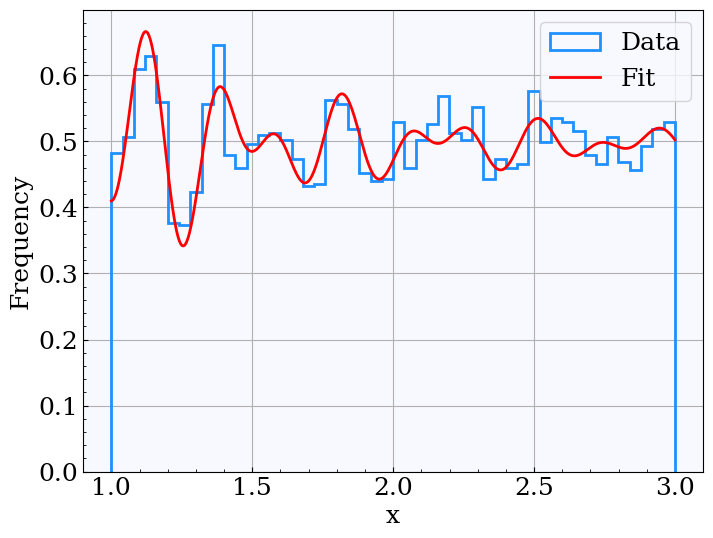

In [88]:
# Plot the data and the fit

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(data, bins=50, histtype='step', lw=2, density=True, label='Data')
ax.plot(x_arr, func(x_arr, *m.values[:]), lw=2, label='Fit')
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.legend();

Text(0.5, 1.0, 'Log-likelihood function')

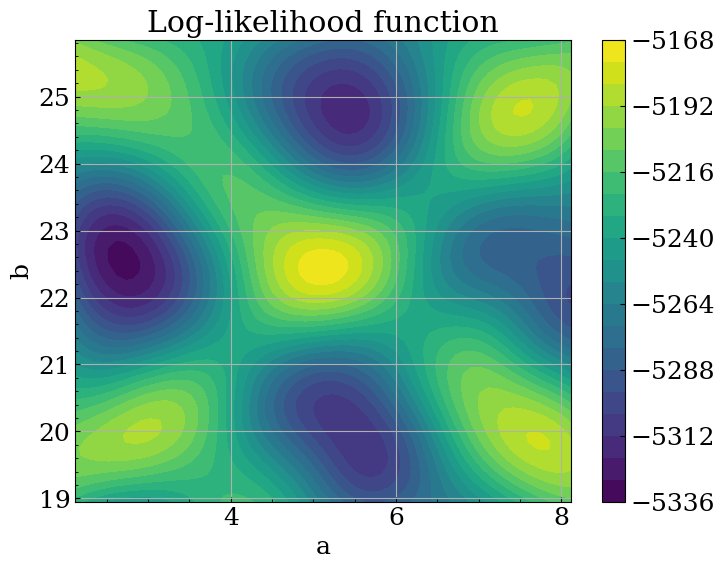

In [89]:
# Make 2D raster scan of the likelihood function

a_arr = np.arange(p[0]-3, p[0]+3, 0.1, )
b_arr = np.arange(p[1]-3.5, p[1]+3.5, 0.1)

llh_arr = np.zeros((len(a_arr), len(b_arr)))

for i, a in enumerate(a_arr):
    for j, b in enumerate(b_arr):
        llh_arr[i, j] = loglike([a, b])

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

c = ax.contourf(a_arr, b_arr, llh_arr.T, levels=20)
fig.colorbar(c, ax=ax)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Log-likelihood function')

In [90]:
# Best fit parameters from the 2D raster scan
a_best = a_arr[np.unravel_index(np.argmax(llh_arr, axis=None), llh_arr.shape)[0]]
b_best = b_arr[np.unravel_index(np.argmax(llh_arr, axis=None), llh_arr.shape)[1]]

print("Best fit parameters from 2D raster scan:")
print("a = ", a_best)
print("b = ", b_best)

# Print the best fit parameters from the Minuit fit
print("Best fit parameters from Minuit fit:")
print("a = ", m.values[0])
print("b = ", m.values[1])

Best fit parameters from 2D raster scan:
a =  5.117488723828918
b =  22.452044170187833
Best fit parameters from Minuit fit:
a =  5.116213678476085
b =  22.451852760503524


# Exercise 4

In [118]:
data = np.loadtxt('Exam_2023_Prob4.txt', skiprows=1)
data = sorted(data)

In [120]:
# x limits for the truncated function
xlim = (min(data), max(data))

# x-array
x_arr = np.linspace(*xlim, 1000)

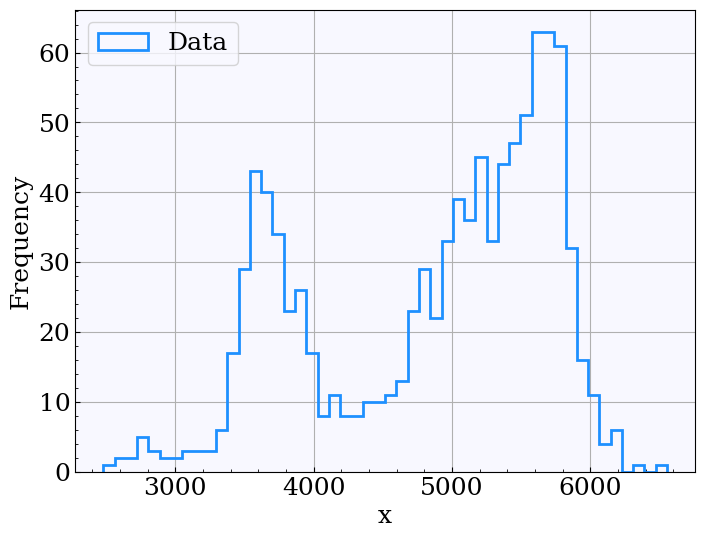

In [124]:
# Plot the data
Nbins = 50 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

hist = ax.hist(data, Nbins, histtype='step', lw=2, label='Data')
bins = hist[1]
bw = hist[1][1]-hist[1][0]
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.legend();

In [131]:
# Fit 2 hypotheses to the data
# Hypothesis 1: Double Gaussian distribution
# Hypothesis 2: Triple Gaussian distribution

def gauss(x, mu, sigma):
    return scipy.stats.norm.pdf(x, mu, sigma)

In [144]:
# Fit first Gaussian 

cut1 = np.argwhere(np.array(data) > 4300)[0][0]
gauss1 = data[:cut1]
N_gauss1 = len(gauss1)
init_params1 = [np.mean(gauss1), np.std(gauss1)]

def llh1(mu, sigma):
    return -np.sum(np.log(gauss(gauss1, mu, sigma)))

m1 = Minuit(llh1, mu=init_params1[0], sigma=init_params1[1])
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2078                       │              Nfcn = 25               │
│ EDM = 1.52e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.657e3  │  0.027e3  │            │            │         │         │       │
│ 1 │ sigma │    321    │    19     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────┐
│       │    mu sigma │
├───────┼─────────────┤
│    mu │   715 0.661 │
│ sigma │ 0.661   357 │
└───────┴─────────────┘

In [145]:
# Fit the second Gaussian

gauss2 = data[cut1:]
N_gauss2 = len(gauss2)
init_params2 = [np.mean(gauss2), np.std(gauss2)]

def llh2(mu, sigma):
    return -np.sum(np.log(gauss(gauss2, mu, sigma)))

m2 = Minuit(llh2, mu=init_params2[0], sigma=init_params2[1])
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5299                       │              Nfcn = 25               │
│ EDM = 3.99e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  5.348e3  │  0.022e3  │            │            │         │         │       │
│ 1 │ sigma │    417    │    16     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────┐
│       │    mu sigma │
├───────┼─────────────┤
│    mu │   490 0.461 │
│ sigma │ 0.461   245 │
└───────┴─────────────┘

Text(0.9, 0.9, 'Gauss 2 fit parameters\n$\\mu=5348.45$\n$\\sigma=417.17$')

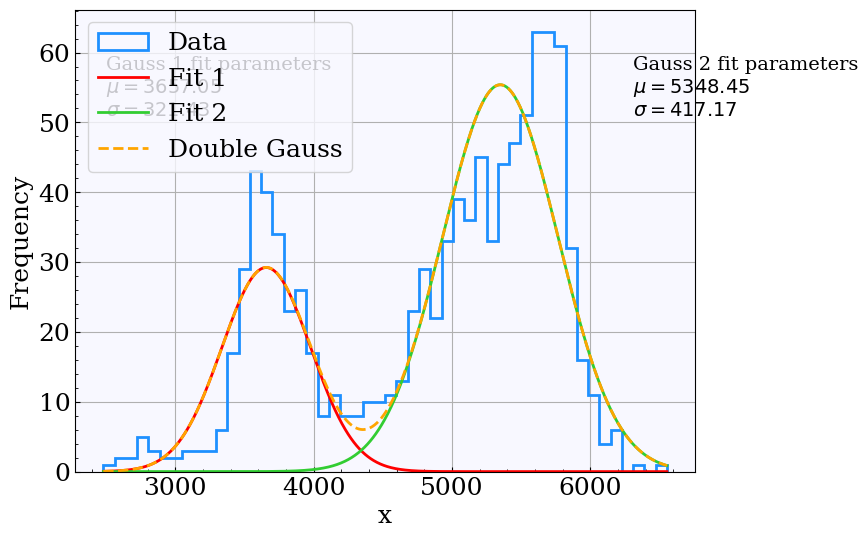

In [150]:
# Plot the two fits on the same plot

double_gauss = N_gauss1 * bw * gauss(x_arr, *m1.values[:]) + N_gauss2 * bw * gauss(x_arr, *m2.values[:])


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(data, Nbins, histtype='step', lw=2, label='Data')
ax.plot(x_arr, N_gauss1 * bw * gauss(x_arr, *m1.values[:]), lw=2, label='Fit 1')
ax.plot(x_arr, N_gauss2 * bw * gauss(x_arr, *m2.values[:]), lw=2, label='Fit 2')
ax.plot(x_arr, double_gauss, lw=2, ls='--', label='Double Gauss')
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.legend()

# Insert text with the mean and sigma of the two fits

textstr1 = '\n'.join((
    'Gauss 1 fit parameters',
    r'$\mu=%.2f$' % (m1.values[0], ),
    r'$\sigma=%.2f$' % (m1.values[1], )))
textstr2 = '\n'.join((
    'Gauss 2 fit parameters',
    r'$\mu=%.2f$' % (m2.values[0], ),
    r'$\sigma=%.2f$' % (m2.values[1], )))

ax.text(0.05, 0.9, textstr1, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

ax.text(0.9, 0.9, textstr2, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
